In [2]:
import pandas as pd
df = pd.read_csv('masked_data.csv')
df.head()

,series number,product type,model,repair operation number,previous repair operation number,time since previous repair,censored,age after repair,Component A,Component B,Component C,Component D,Component E,Component F,Component H,Component I,Component J,Component K
0,sn_000001,product A,V1E1,po_000001,MFG,5090,0,5090,0,0,0,1,1,0,0,0,0,0
1,sn_000001,product A,V1E2,po_000002,po_000001,5326,0,10366,0,0,0,0,1,0,0,0,0,0
2,sn_000001,product A,V1E2,po_000003,po_000002,3926,1,14242,0,0,0,0,0,0,0,0,0,0
3,sn_000002,product A,V1E1,po_000004,MFG,8686,0,8686,0,0,0,0,1,0,0,0,0,0
4,sn_000002,product A,V1E2,po_000005,po_000004,5690,1,14326,0,0,0,0,0,0,0,0,0,0


In [3]:
failure_times = df['time since previous repair'].tolist()
censors = df['censored'].tolist()
products = df['product type'].tolist()
failure_times_A = []
censored_failures_A = []
failure_times_B = []
censored_failures_B = []
censored_failures = []
for i in range(len(products)):
    if censors[i] == 1:
        censored_failures.append(failure_times[i])
    if products[i] == 'product A':
        failure_times_A.append(failure_times[i])
        if censors[i] == 1:
            censored_failures_A.append(failure_times[i])
    elif products[i] == 'product B':
        failure_times_B.append(failure_times[i])
        if censors[i] == 1:
            censored_failures_B.append(failure_times[i])


c:\Users\Ruben\AppData\Local\Programs\Python\Python310\lib\site-packages\reliability\Fitters.py:440: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(


Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 13222/7621 (36.56383% right censored) 

   Distribution   Alpha    Beta   Gamma Alpha 1  Beta 1 Alpha 2  Beta 2 Proportion 1       DS      Mu    Sigma      Lambda  Log-likelihood   AICc    BIC      AD optimizer
Weibull_Mixture                         6415.63 1.74947 15857.8 23.3509     0.923066                                               -129466 258941 258981 16.8199       TNC
     Weibull_DS  6960.5 1.64462                                                      0.978125                                      -129618 259242 259266 37.9106       TNC
     Weibull_CR                         7215.41  1.5952 17086.9  20.539                                                            -129618 259243 259275 52.4616       TNC
     Weibull_2P 7195.06  1.6045                                                                                                    -129633 259270 259286  48.183       TNC
     Weibull_3P 7182.43 1.59

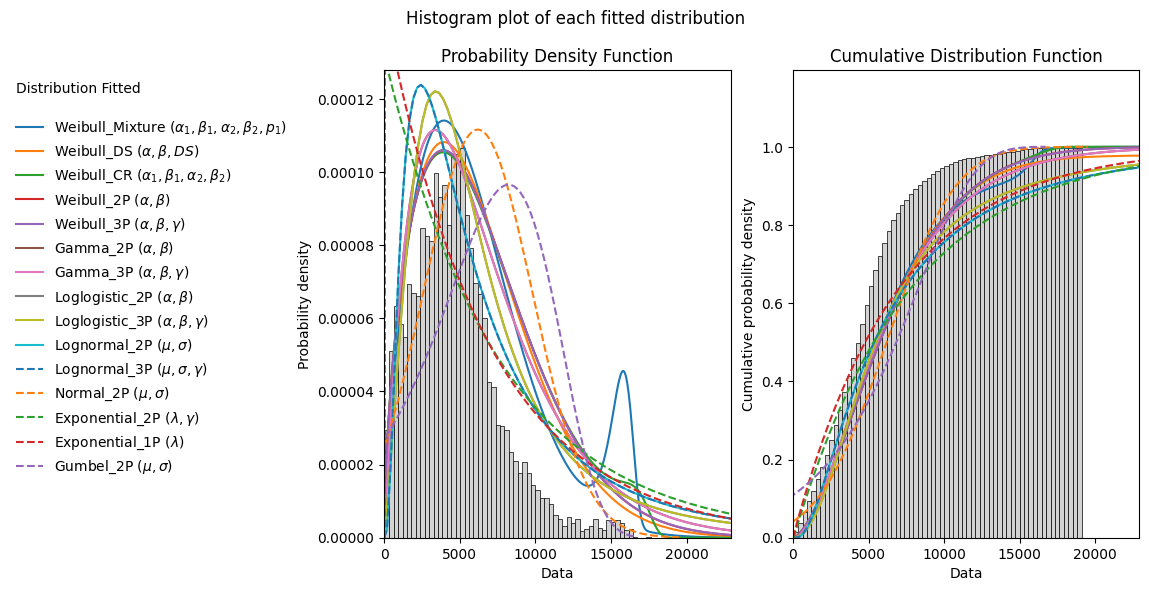

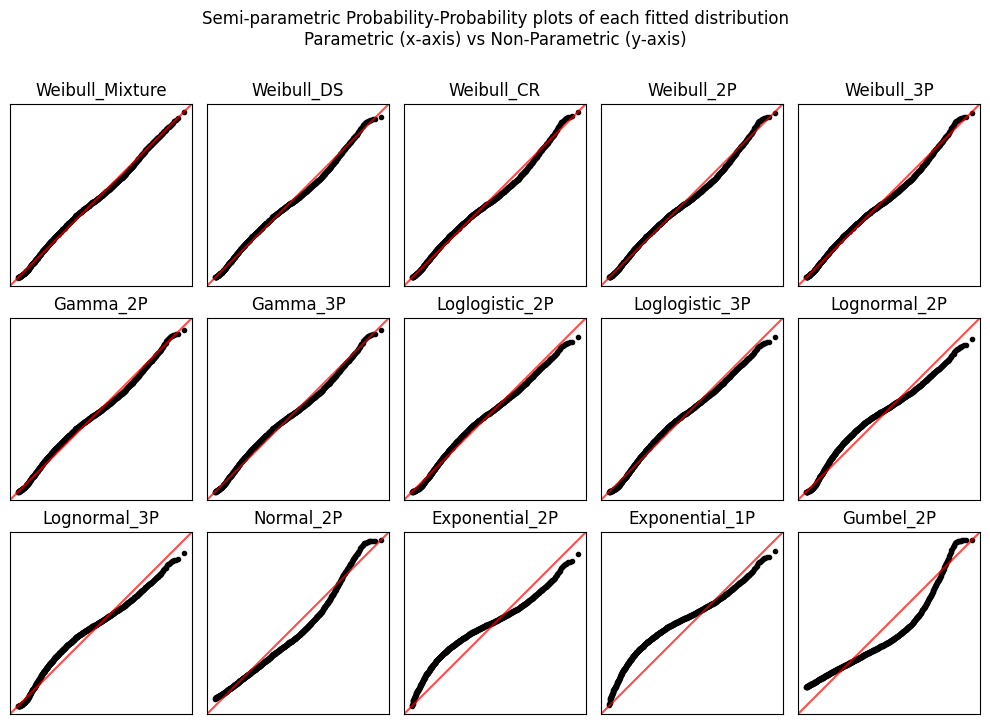

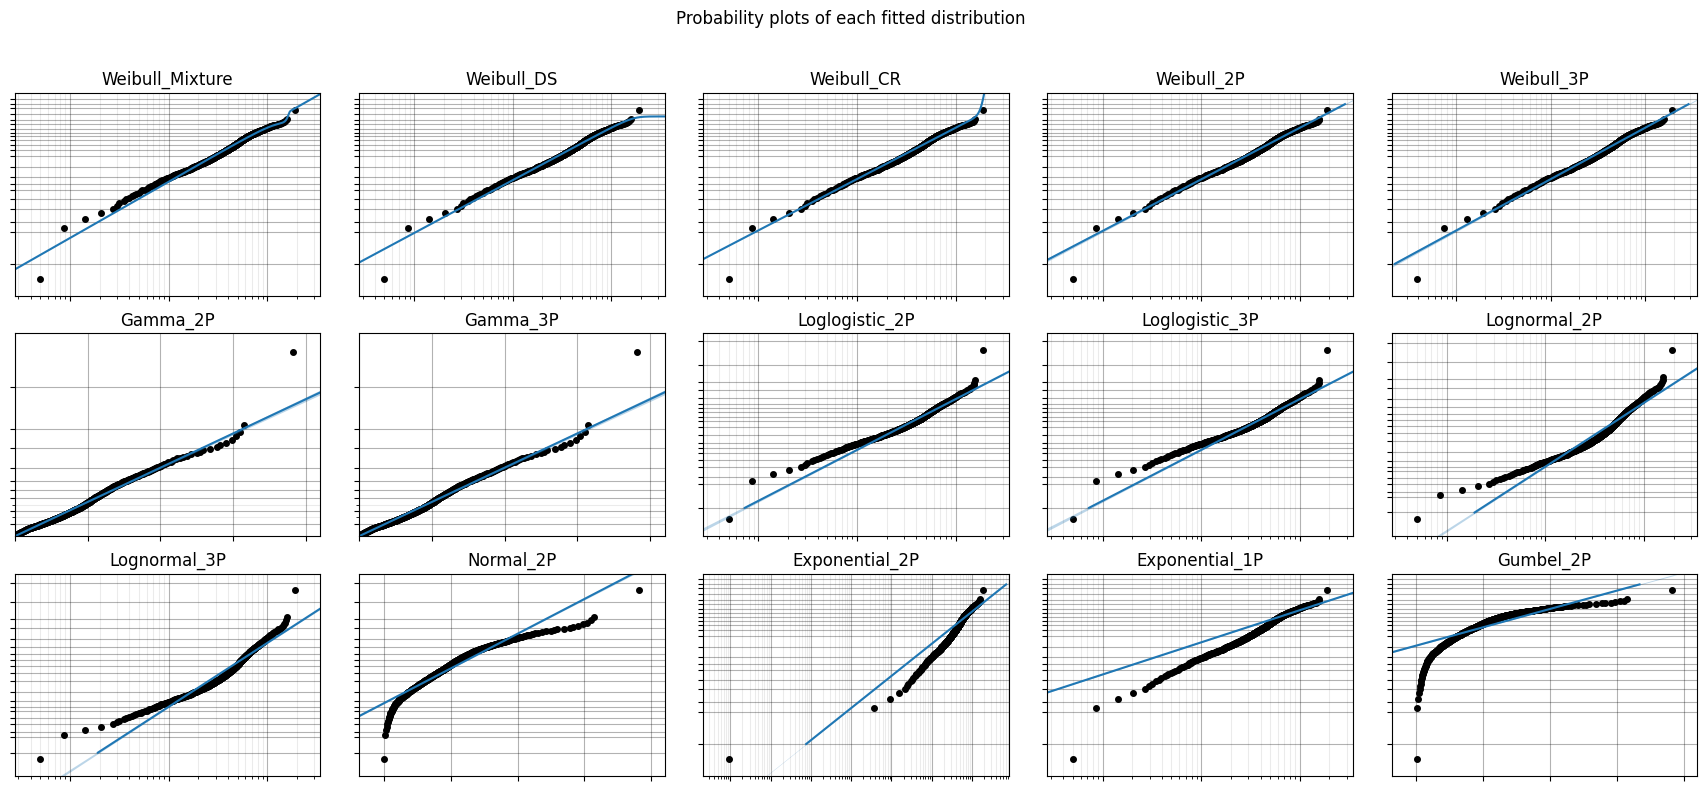

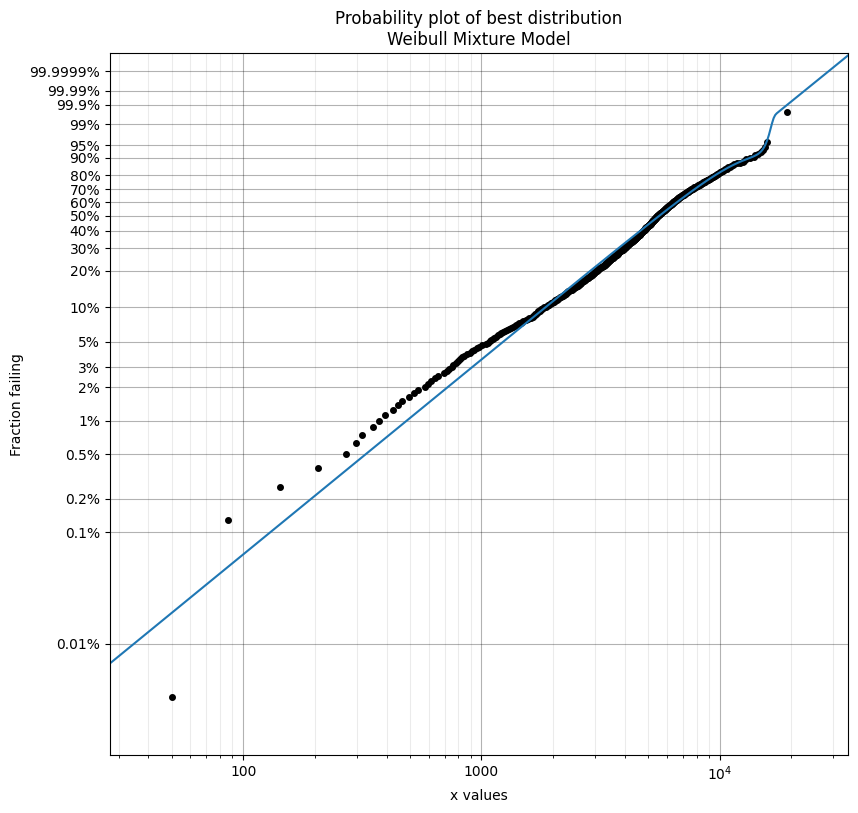

In [4]:
from reliability.Fitters import Fit_Everything
Fit_Everything(failures= failure_times, right_censored = censored_failures)

c:\Users\Ruben\AppData\Local\Programs\Python\Python310\lib\site-packages\reliability\Fitters.py:440: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(


Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 2700/1038 (27.76886% right censored) 

   Distribution   Alpha    Beta   Gamma Alpha 1  Beta 1 Alpha 2  Beta 2 Proportion 1       DS      Mu    Sigma      Lambda  Log-likelihood    AICc     BIC      AD optimizer
Weibull_Mixture                         5580.51 1.86094 15808.5 18.9098     0.794363                                              -26506.2 53022.3 53053.5 7.39805       TNC
     Weibull_CR                         8280.89 1.33869 16587.3 19.4157                                                             -26733 53474.1   53499 35.5721  L-BFGS-B
 Loglogistic_2P 5713.52 1.98422                                                                                                   -26746.9 53497.9 53510.3 26.0072       TNC
 Loglogistic_3P 5713.52 1.98422       0                                                                                           -26746.9 53499.9 53518.5 26.0072       TNC
       Gamma_2P 422

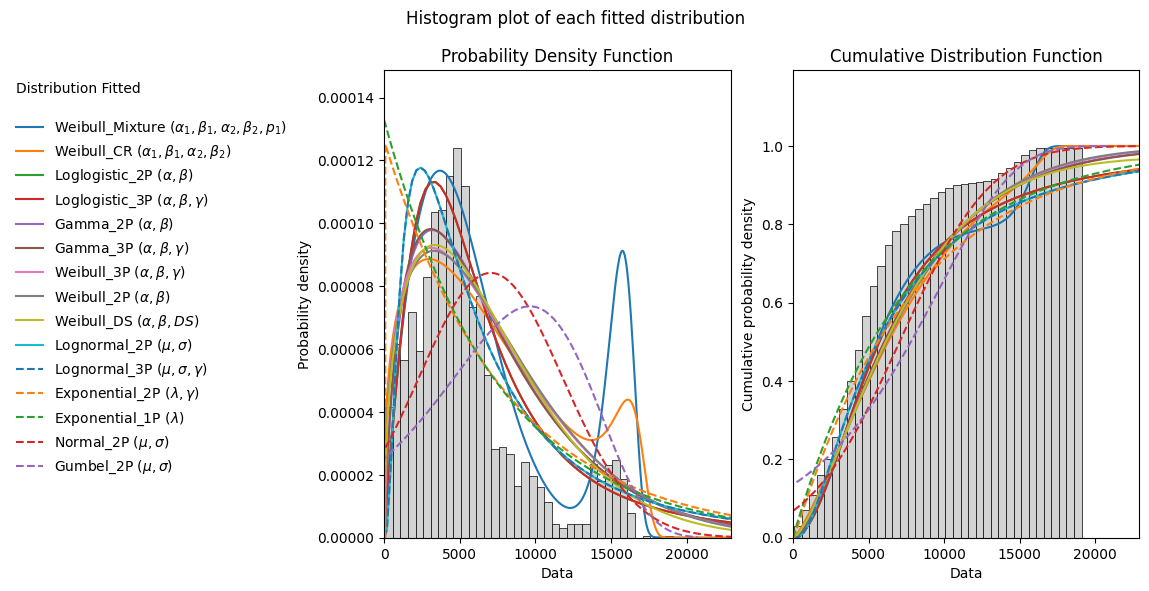

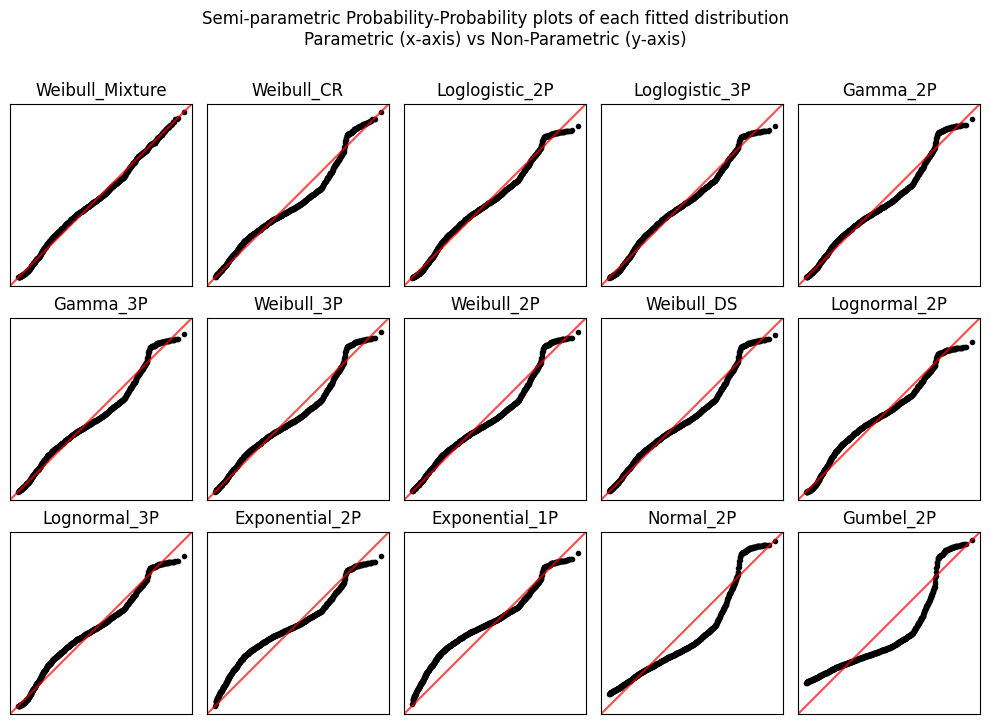

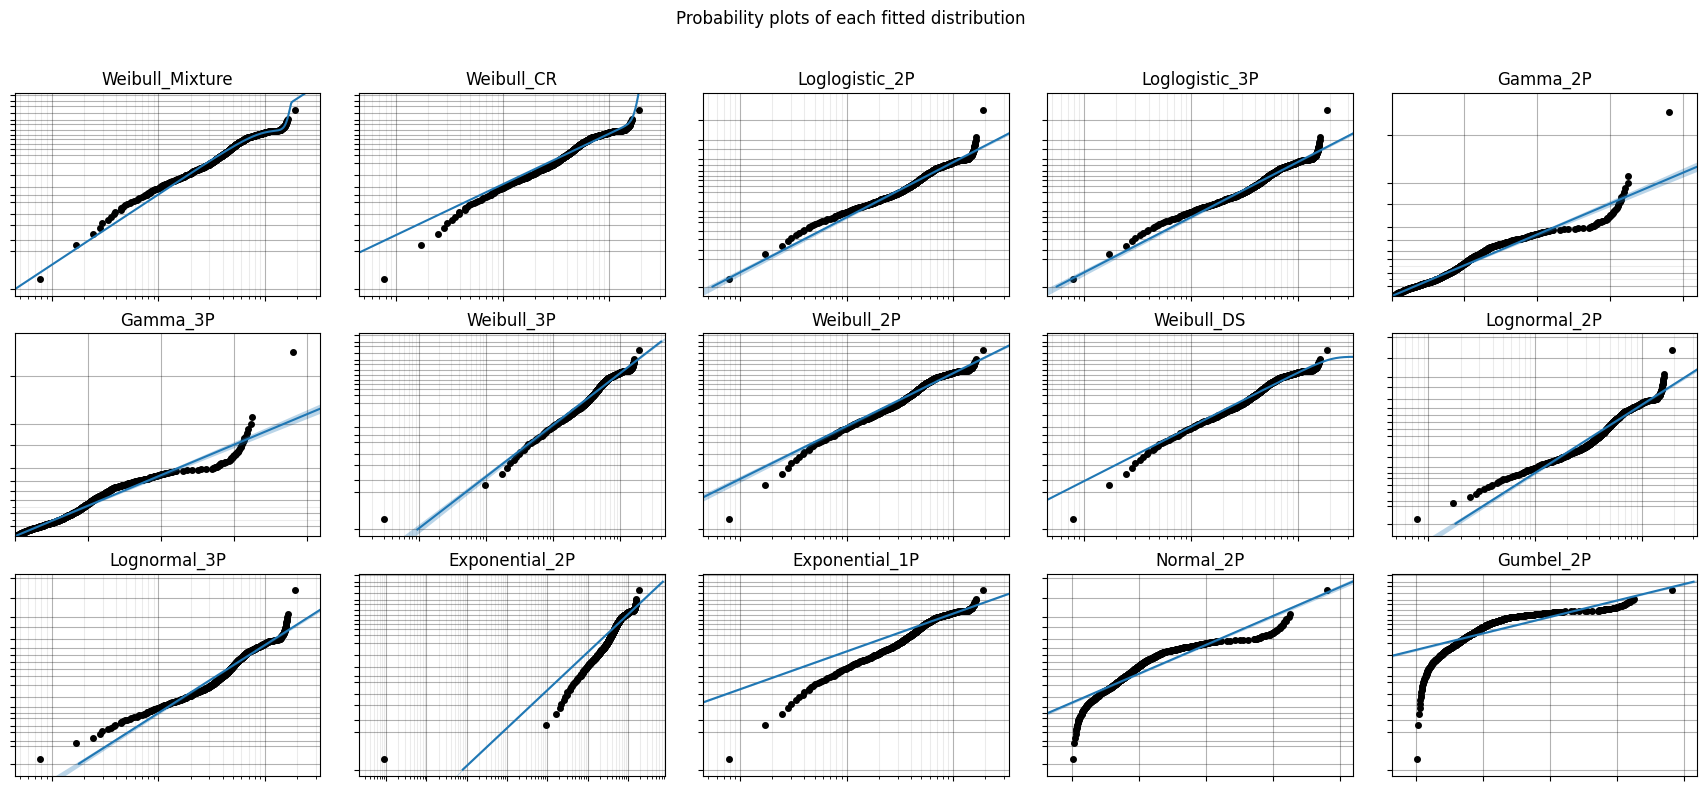

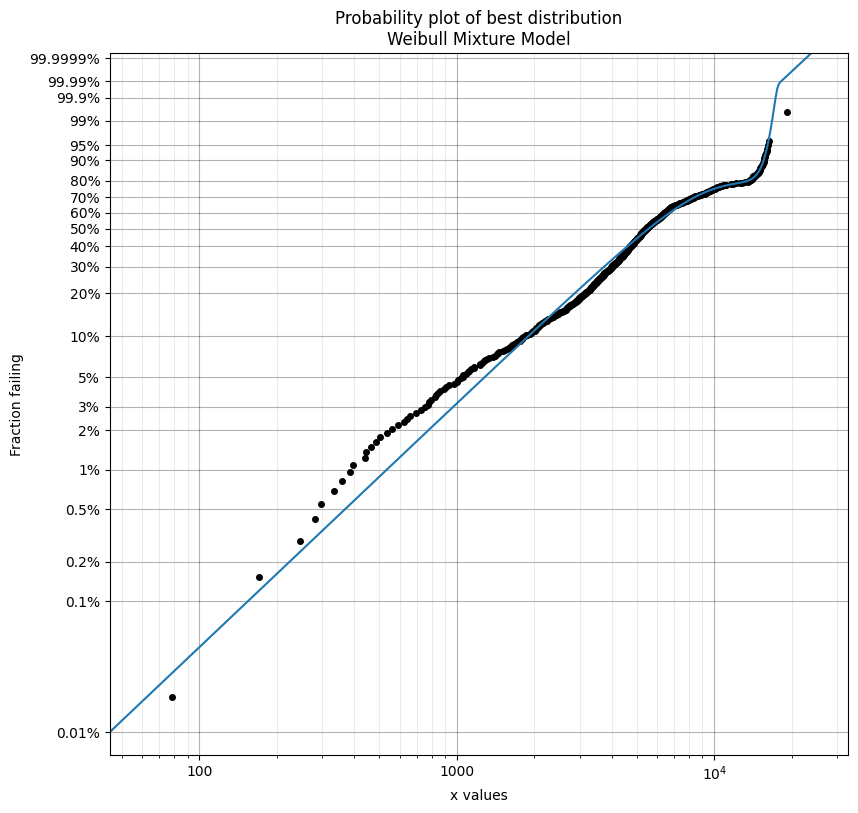

In [5]:
Fit_Everything(failures= failure_times_A, right_censored = censored_failures_A)

c:\Users\Ruben\AppData\Local\Programs\Python\Python310\lib\site-packages\reliability\Fitters.py:440: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(


Results from Fit_Everything:
Analysis method: MLE
Failures / Right censored: 10522/6583 (38.48582% right censored) 

   Distribution   Alpha    Beta   Gamma Alpha 1  Beta 1 Alpha 2  Beta 2 Proportion 1 DS      Mu    Sigma      Lambda  Log-likelihood   AICc    BIC      AD optimizer
     Weibull_CR                         8344.81 1.53634 12211.6 2.50376                                                      -102669 205346 205377  23.434  L-BFGS-B
Weibull_Mixture                         6618.43 1.75184 12757.2 21.6352      0.96402                                         -102675 205360 205398 22.0208       TNC
     Weibull_2P  6903.7 1.71283                                                                                              -102692 205389 205404 25.6414       TNC
     Weibull_DS  6903.7 1.71283                                                       1                                      -102692 205391 205414 25.6414       TNC
     Weibull_3P  6903.7 1.71283       0                   

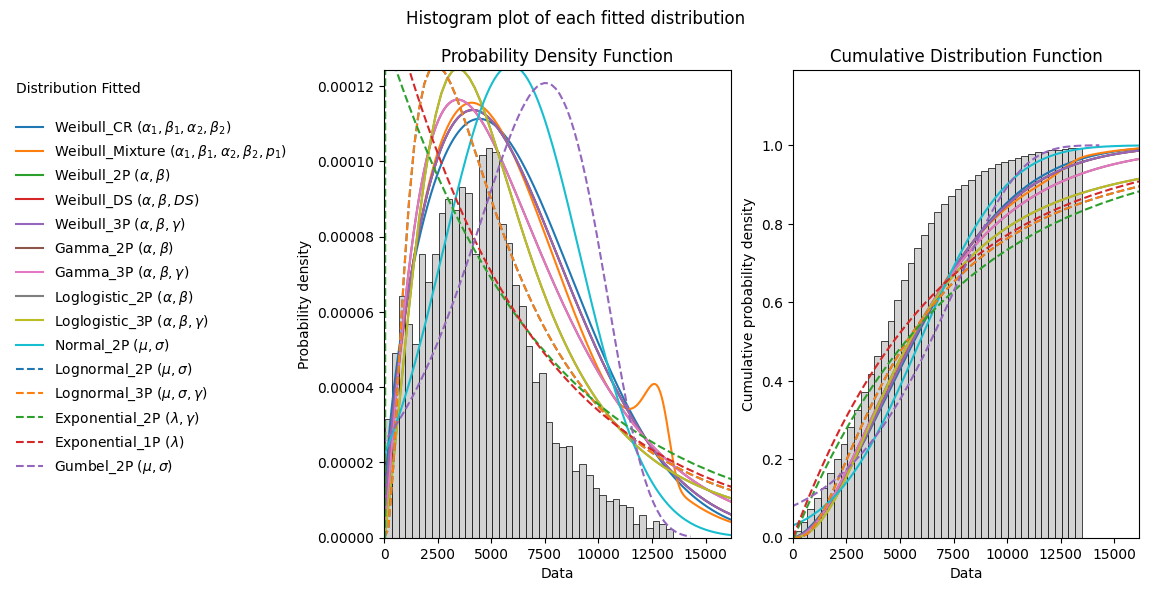

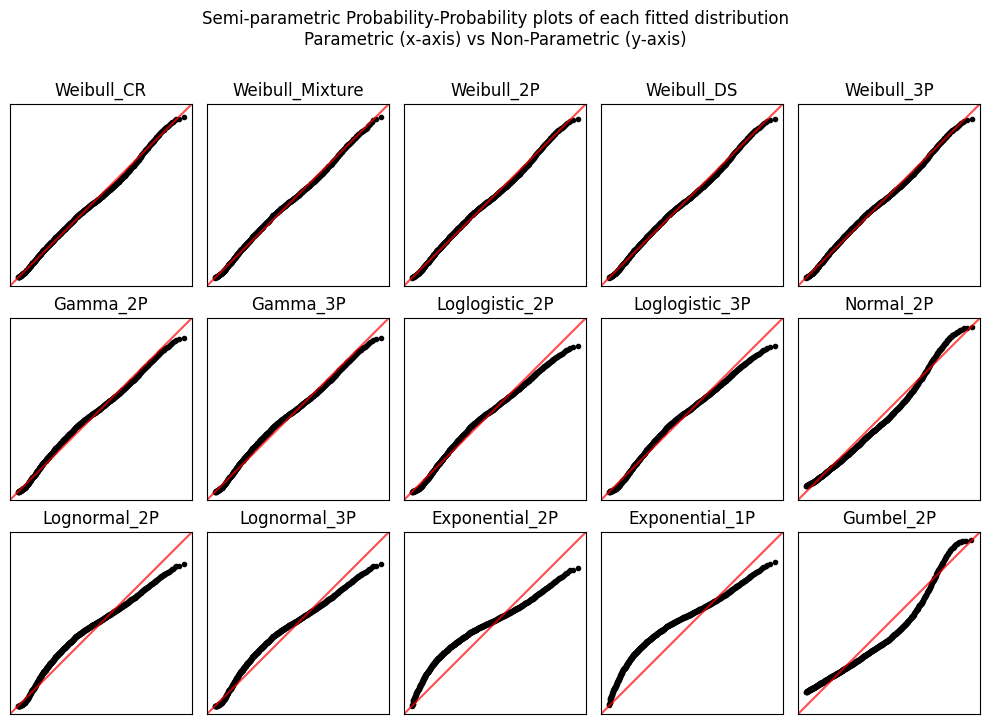

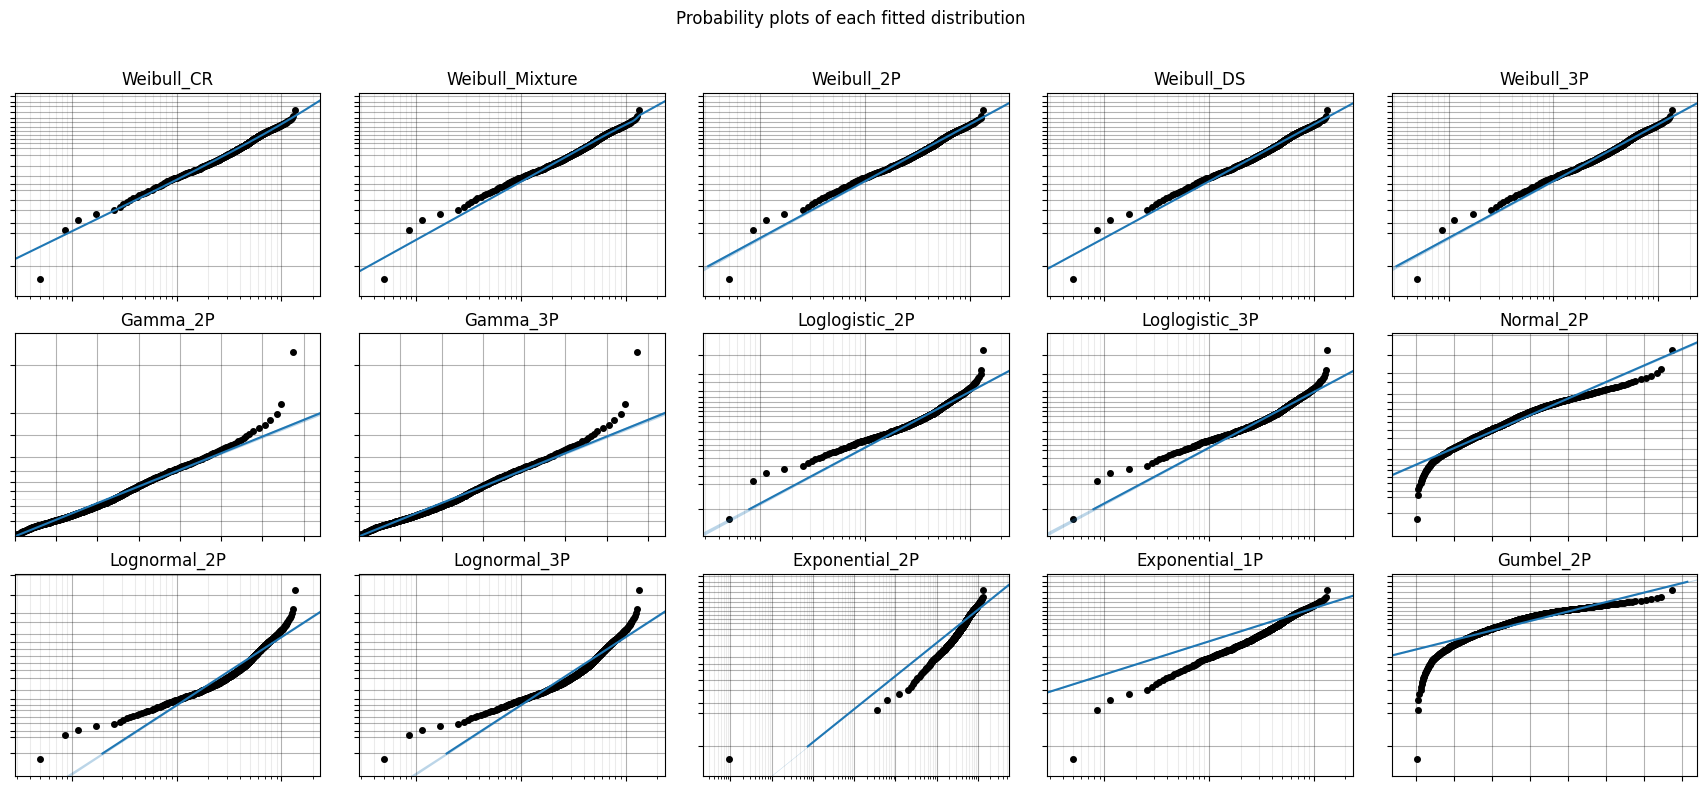

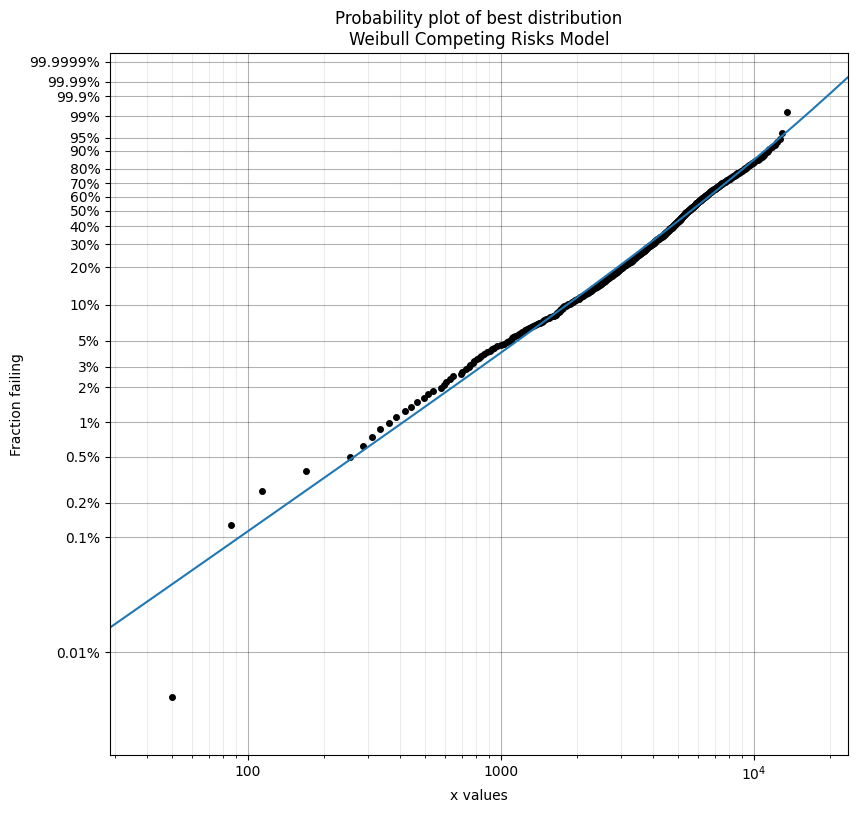

In [6]:
Fit_Everything(failures= failure_times_B, right_censored = censored_failures_B)

In [7]:
models = df['model'].tolist()
censored_failures_E1=[]
failures_E1=[]
for i in range(len(censors)):
    if censors[i] == 1:
        censored_failures.append(failure_times[i])
print(censored_failures)

[3926, 5690, 10562, 6266, 5154, 4090, 4430, 14334, 4370, 5646, 2006, 4558, 1602, 14326, 3334, 4650, 4554, 1762, 5626, 4866, 3690, 6554, 9946, 3674, 5634, 3714, 3810, 3574, 2466, 3474, 6662, 4006, 5178, 2794, 2646, 5630, 2462, 3882, 5690, 774, 4754, 7254, 4482, 14194, 6418, 4062, 10110, 818, 4458, 6246, 4262, 446, 4674, 9206, 10250, 782, 5150, 14170, 3058, 3926, 7866, 3638, 10078, 1962, 5290, 4930, 14154, 14154, 14146, 5994, 4810, 7078, 5130, 4206, 8938, 14134, 14130, 5154, 4626, 14126, 14114, 14114, 14114, 14110, 3434, 14078, 7842, 14106, 14102, 4846, 10218, 14086, 5842, 14098, 5074, 14082, 3502, 4958, 1058, 7978, 5538, 14070, 10830, 4782, 14062, 14058, 3670, 4062, 7118, 14054, 12786, 2978, 2930, 9934, 2710, 830, 3162, 4958, 10390, 4782, 3638, 6126, 862, 4054, 14018, 4458, 3578, 3998, 2462, 13998, 7814, 13994, 7022, 9578, 5662, 3450, 3618, 4538, 4930, 894, 5146, 3718, 4554, 1166, 3530, 5170, 13974, 13974, 13974, 810, 13962, 3434, 13962, 1602, 4986, 1782, 4062, 5326, 2326, 2462, 4206, 1

In [8]:
import pandas as pd

# Supposons que votre DataFrame df contient déjà les colonnes nécessaires,
# par exemple 'series number', 'product type', 'model', 'time since previous repair', 'age after repair', 'censored', etc.

# 1. Calcul du coefficient de propension (nouveauté)
df['coefficient_propension'] = df['time since previous repair'] / df['age after repair']

# 2. Calcul de l'usure accumulée (proportion de vie déjà usée)
df['usure_accumulee'] = 1 - df['coefficient_propension']

# 3. Définition d'une pondération combinant "nouveauté" et "usure accumulée"
beta = 0.7  # Paramètre à ajuster selon la sensibilité souhaitée à l'usure accumulée
df['weight'] = df['coefficient_propension'] * (1 - beta * df['usure_accumulee'])

# 4. Filtrer les défaillances observées (censored == 0)
df_failures = df[df['censored'] == 0]

# 5. Calcul du MTTF par type de produit et par version

# MTTF ajusté : moyenne pondérée par le coefficient weight
mttf_adjusted_with_wear = df_failures.groupby(['product type', 'model']).apply(
    lambda group: (group['time since previous repair'] * group['weight']).sum() / group['weight'].sum()
)

# Pour comparaison, MTTF non ajusté : moyenne simple des temps entre réparations
mttf_non_adjusted = df_failures.groupby(['product type', 'model'])['time since previous repair'].mean()

print("\nMTTF non ajusté par type de produit et par version :")
print(mttf_non_adjusted)

print("\nMTTF ajusté par type de produit et par version (en tenant compte de l'usure accumulée) :")
print(mttf_adjusted_with_wear)



MTTF non ajusté par type de produit et par version :
product type  model
product A     V1E1    5074.92
              V1E2    3621.14
              V1E3       1034
product B     V1E1    3980.84
              V1E2    3705.55
              V1E3    1279.19
              V2E2    4728.68
              V2E3     1710.8
Name: time since previous repair, dtype: float64

MTTF ajusté par type de produit et par version (en tenant compte de l'usure accumulée) :
product type  model
product A     V1E1    5496.09
              V1E2    4512.52
              V1E3    1451.19
product B     V1E1    4078.02
              V1E2     4146.9
              V1E3    1868.59
              V2E2    4943.26
              V2E3    1928.54
dtype: float64


C:\Users\Ruben\AppData\Local\Temp\ipykernel_21540\4006722884.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mttf_adjusted_with_wear = df_failures.groupby(['product type', 'model']).apply(


In [2]:
!pip install lifelines


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from lifelines import WeibullAFTFitter

# -----------------------------------------------------
# 0) CHARGEMENT DU FICHIER ET PREMIÈRES TRANSFORMATIONS
# -----------------------------------------------------
df = pd.read_csv("masked_data.csv")

# -----------------------------------------------------
# 1) DÉFINIR LA VARIABLE D'EXPOSITION : NOUVELLE VERSION DE E
# -----------------------------------------------------
df['version_E'] = df['model'].str.extract(r'E(\d+)').astype(int)
df['E_new'] = (df['version_E'] > 1).astype(int)  # E_new=1 si E2/E3, =0 sinon E1

# -----------------------------------------------------
# 2) IDENTIFIER LES CONFOUNDERS (exemple : âge, type de produit)
# -----------------------------------------------------
df['age'] = df['age after repair']

# Encodage one-hot sur 'product type'
df = pd.get_dummies(df, columns=['product type'], drop_first=True)

# -----------------------------------------------------
# 3) CRÉATION DE LA MATRICE X ET Y POUR LOGIT
#    (score de propension)
# -----------------------------------------------------
y = df['E_new']

# On ajoute une constante
df['const'] = 1.0

# Colonnes explicatives (âge, dummies de type produit, etc.)
X_cols = ['const', 'age']
for col in df.columns:
    if col.startswith("product type_"):
        X_cols.append(col)

X = df[X_cols].copy()

# Conversion des bool en int + force en numérique
for c in X.select_dtypes(include=['bool']).columns:
    X[c] = X[c].astype(int)

X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

# Supprimer les lignes NaN
keep_index = X.dropna().index
X = X.loc[keep_index]
y = y.loc[keep_index]

# -----------------------------------------------------
# 4) RÉGRESSION LOGISTIQUE : SCORE DE PROPENSION
# -----------------------------------------------------
logit_model = sm.Logit(y, X).fit(disp=0)
print("----- RÉGRESSION LOGISTIQUE (SCORE DE PROPENSION) -----")
print(logit_model.summary())

df['p_score'] = logit_model.predict(X)

# -----------------------------------------------------
# 5) CALCUL DES POIDS IPW
# -----------------------------------------------------
df['weight_ipw'] = np.where(
    df['E_new'] == 1,
    1 / df['p_score'],
    1 / (1 - df['p_score'])
)

# -----------------------------------------------------
# 6) ANALYSE DE SURVIE PARAMÉTRIQUE (WEIBULL AFT) PONDÉRÉE
# -----------------------------------------------------
df['duration'] = df['time since previous repair']
df['event_observed'] = 1 - df['censored']  # lifelines: 1 = panne, 0 = censuré

aft_cols = ['duration', 'event_observed', 'weight_ipw', 'E_new', 'age']
aft_df = df[aft_cols].copy()

aft = WeibullAFTFitter()
aft.fit(
    df=aft_df,
    duration_col='duration',
    event_col='event_observed',
    weights_col='weight_ipw',
    formula="E_new + age"
)

print("----- MODÈLE WEIBULL AFT -----")
#aft.print_summary(5)

# -----------------------------------------------------
# 7) EXTRAIRE LE RÉSULTAT POUR 'E_new' ET IMPRIMER UNE INTERPRÉTATION
# -----------------------------------------------------
res = aft.summary  # DataFrame avec les colonnes: coef, exp(coef), p, etc.


# Affichons l'index pour vérifier les noms
print("Index des lignes dans aft.summary :")
print(res.index)

# Recherche de la variable E_new (sous forme "lambda_ E_new")
idx_e_new = None
for idx in res.index:
    if "E_new" in idx:  # repère la ligne contenant E_new
        idx_e_new = idx
        break

if idx_e_new is not None:
    row_e_new = res.loc[idx_e_new]
    e_new_coef = row_e_new["coef"]       # β
    e_new_exp  = row_e_new["exp(coef)"]  # exp(β)
    e_new_p    = row_e_new["p"]          # p-value
    
    if e_new_exp > 1:
        gain_pct = 100 * (e_new_exp - 1.0)
        interpretation = (f"Les nouvelles versions E_new allonge la durée de vie d’environ "
                          f"{gain_pct:.1f}% (p={e_new_p:.2e}).")
    else:
        loss_pct = 100 * (1.0 - e_new_exp)
        interpretation = (f"Les nouvelles versions E_new réduit la durée de vie d’environ "
                          f"{loss_pct:.1f}% (p={e_new_p:.2e}).")

    print(f"\n*** Résultat pour {idx_e_new} ***")
    print(f"coef = {e_new_coef:.5f}, exp(coef) = {e_new_exp:.5f}, p={e_new_p:.2e}")
    print(interpretation)

else:
    print("La variable E_new n'apparaît pas dans aft.summary.")

    print("La variable 'E_new' n'apparaît pas dans les résultats du modèle.")


----- RÉGRESSION LOGISTIQUE (SCORE DE PROPENSION) -----
                           Logit Regression Results                           
Dep. Variable:                  E_new   No. Observations:                13222
Model:                          Logit   Df Residuals:                    13219
Method:                           MLE   Df Model:                            2
Date:                Sat, 15 Feb 2025   Pseudo R-squ.:                  0.2645
Time:                        15:47:00   Log-Likelihood:                -4303.0
converged:                       True   LL-Null:                       -5850.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.8995      0.095    -19.950      0.000      -2.086      -1.713
age                        0.0002   7.8

c:\Users\Ruben\AppData\Local\Programs\Python\Python310\lib\site-packages\lifelines\fitters\__init__.py:1379: StatisticalWarning: It appears your weights are not integers, possibly propensity or sampling scores then?
                                        It's important to know that the naive variance estimates of the coefficients are biased. Instead a) set `robust=True` in the call to `fit`, or b) use Monte Carlo to
                                        estimate the variances. See paper "Variance estimation when using inverse probability of treatment weighting (IPTW) with survival analysis
  warnings.warn(


----- MODÈLE WEIBULL AFT -----
Index des lignes dans aft.summary :
MultiIndex([('lambda_', 'Intercept'),
            ('lambda_',     'E_new'),
            ('lambda_',       'age'),
            (   'rho_', 'Intercept')],
           names=['param', 'covariate'])

*** Résultat pour ('lambda_', 'E_new') ***
coef = 0.19170, exp(coef) = 1.21131, p=1.12e-153
Les nouvelles versions E_new allonge la durée de vie d’environ 21.1% (p=1.12e-153).


In [11]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from lifelines import WeibullAFTFitter

# -----------------------------------------------------
# 1) CHARGEMENT DES DONNÉES ET PRÉPARATION
# -----------------------------------------------------
df = pd.read_csv("masked_data.csv")

# Hypothèse : pour indiquer si un produit est "réparé" vs "non réparé",
# on utilise la colonne 'previous repair operation number'.
# Ex. si c’est "MFG" => jamais réparé, sinon => déjà réparé.
df['repaired'] = (df['previous repair operation number'] != 'MFG').astype(int)

# On définit l'âge
df['age'] = df['age after repair']

# -----------------------------------------------------
# 2) ENCODAGE DES CONFOUNDERS (product type, model)
# -----------------------------------------------------
# On crée des dummies pour 'product type' et 'model' (si nécessaire).
df = pd.get_dummies(df, columns=['product type','model'], drop_first=True)

# -----------------------------------------------------
# 3) SCORE DE PROPENSION : RÉGRESSION LOGISTIQUE
# -----------------------------------------------------
y = df['repaired']
df['const'] = 1.0

# Sélection des confounders à inclure dans la Logit
confounder_cols = ['age']
confounder_cols += [col for col in df.columns if col.startswith('product type_')]
confounder_cols += [col for col in df.columns if col.startswith('model_')]
X_cols = ['const'] + confounder_cols

X = df[X_cols].copy()

# Convertir d'éventuels bool en int
for c in X.select_dtypes(include=['bool']).columns:
    X[c] = X[c].astype(int)

# Forcer en numérique et gérer les NaN
X = X.apply(pd.to_numeric, errors='coerce')
y = pd.to_numeric(y, errors='coerce')

keep_index = X.dropna().index
X = X.loc[keep_index]
y = y.loc[keep_index]

# Régression logistique
logit_model = sm.Logit(y, X).fit(disp=0)
print("=== RÉGRESSION LOGISTIQUE (SCORE DE PROPENSION) ===")
print(logit_model.summary())

df['p_score'] = logit_model.predict(X)

# -----------------------------------------------------
# 4) CALCUL DES POIDS IPW
# -----------------------------------------------------
df['weight_ipw'] = np.where(
    df['repaired'] == 1,
    1 / df['p_score'],
    1 / (1 - df['p_score'])
)

# -----------------------------------------------------
# 5) ANALYSE DE SURVIE (WEIBULL AFT) PONDÉRÉE
# -----------------------------------------------------
df['duration'] = df['time since previous repair']
df['event_observed'] = 1 - df['censored']  # lifelines: 1 = panne, 0 = censuré

aft_cols = ['duration', 'event_observed', 'weight_ipw', 'repaired', 'age']
aft_df = df[aft_cols].copy()

aft = WeibullAFTFitter()
aft.fit(
    df=aft_df,
    duration_col='duration',
    event_col='event_observed',
    weights_col='weight_ipw',
    formula="repaired + age"  # On peut inclure + d'autres confounders au besoin
)

print("\n=== MODÈLE WEIBULL AFT ===")
aft.print_summary(5)

# -----------------------------------------------------
# 6) EXTRACTION ET INTERPRÉTATION DE L'EFFET 'repaired'
# -----------------------------------------------------
res = aft.summary
idx_rep = None
for idx in res.index:
    if "repaired" in idx:  # Cherche la ligne correspondant à 'repaired'
        idx_rep = idx
        break

if idx_rep is not None:
    row_rep = res.loc[idx_rep]
    coef_val = row_rep["coef"]
    exp_val  = row_rep["exp(coef)"]
    p_val    = row_rep["p"]

    if exp_val > 1:
        gain_pct = 100 * (exp_val - 1)
        interpretation = (f"La réparation ALLONGE la durée de vie d’environ {gain_pct:.1f}% "
                          f"(p={p_val:.2e}).")
    else:
        loss_pct = 100 * (1 - exp_val)
        interpretation = (f"La réparation RÉDUIT la durée de vie d’environ {loss_pct:.1f}% "
                          f"(p={p_val:.2e}).")

    print(f"\n*** Résultat pour '{idx_rep}' ***")
    print(f"coef = {coef_val:.5f}, exp(coef) = {exp_val:.5f}, p = {p_val:.2e}")
    print(interpretation)
else:
    print("La variable 'repaired' n'apparaît pas dans le summary du modèle.")


c:\Users\Ruben\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Ruben\AppData\Local\Programs\Python\Python310\lib\site-packages\lifelines\fitters\__init__.py:1379: StatisticalWarning: It appears your weights are not integers, possibly propensity or sampling scores then?
                                        It's important to know that the naive variance estimates of the coefficients are biased. Instead a) set `robust=True` in the call to `fit`, or b) use Monte Carlo to
                                        estimate the variances. See paper "Variance estimation when using inverse probability of treatment weighting (IPTW) with survival analysis
  warnings.warn(


=== RÉGRESSION LOGISTIQUE (SCORE DE PROPENSION) ===
                           Logit Regression Results                           
Dep. Variable:               repaired   No. Observations:                13222
Model:                          Logit   Df Residuals:                    13215
Method:                           MLE   Df Model:                            6
Date:                Sat, 15 Feb 2025   Pseudo R-squ.:                  0.3686
Time:                        16:28:02   Log-Likelihood:                -5707.6
converged:                      False   LL-Null:                       -9040.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -3.6856      0.106    -34.858      0.000      -3.893      -3.478
age                        0.0003   8.37e-0

<lifelines.WeibullAFTFitter: fitted with 26855.9 total observations, 13849.2 right-censored observations>
             duration col = 'duration'
                event col = 'event_observed'
              weights col = 'weight_ipw'
   number of observations = 26855.9
number of events observed = 13006.7
           log-likelihood = -122660.12382
         time fit was run = 2025-02-15 15:28:02 UTC

---
                      coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
param   covariate                                                                                                      
lambda_ Intercept  7.85637 2582.13410   0.01213         7.83261         7.88014          2521.48972          2644.23703
        repaired  -0.81844    0.44112   0.00942        -0.83691        -0.79997             0.43305             0.44934
        age        0.00019    1.00019   0.00000         0.00019         0.00019             1.00019             1.00019
rho_    Intercept  0.71084    2.03571   0.00730         0.69655         0.72514             2.00681             2.06503

                   cmp to         z      p  -log2(p)
param   covariate                                   
lambda_ Intercept 0.00000 647.89974 <5e-06       inf
        repaired  0.00000 -86.84687 <5e-06       inf
        age       0.00000 117.11071 <5e-06       inf
rho_    Intercept 0.00000  97.44045 <5e-06       inf
---
Concordance = 0.87053
AIC = 245328.24764
log-likelihood ratio test = 20500.67759 on 2 df
-log2(p) of ll-ratio test = inf


*** Résultat pour '('lambda_', 'repaired')' ***
coef = -0.81844, exp(coef) = 0.44112, p = 0.00e+00
La réparation RÉDUIT la durée de vie d’environ 55.9% (p=0.00e+00).
